In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Maria Hovhannisyan

 First of all let me tell what I've tried to do, so it can be easy for you understanding my notebook.First I runned all allowed model on our data <b>without doing anything</b> (just train/test split).  And it gave us <b>78.3%</b> accuracy with Decision Tree. <br>
 Then I explored every feature seperately/paired and did some <b>visualizations.</b> <br>
 Then I have investigated various ways for <b>handling outlier</b> . And on my notebook you can see 3 different ways. But best result gave me using z-score (I know that it is more for Normal distribution, but it worked for our data much better). I was trying to find good ways for skewed data, but it didn't give me good results. And I looked at the data as 2 distributins 'came_back' = 0 and 'came_back' = 1. <br>
 Then I started to solve <b>balancing</b> problem. I've created two dataframes with undersampling and oversampling my data. Then _scaling and modeling_. In the end I've written a <b>conclusion.</b>

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
0,255863,1,63,45,0,0,0,2,1,1,2,0
1,583906,4,350,72,0,0,0,2,1,4,6,0
2,280626,12,1019,123,5,2,6,6,1,9,14,0
3,357109,1,503,124,0,0,30,16,0,0,0,0
4,264311,15,1869,139,0,0,34,13,1,12,25,1


In [4]:
df.shape

(658052, 12)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658052 entries, 0 to 658051
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Unnamed: 0                      658052 non-null  int64
 1   n_visits                        658052 non-null  int64
 2   n_actions                       658052 non-null  int64
 3   unique_actions                  658052 non-null  int64
 4   products_tried                  658052 non-null  int64
 5   products_added                  658052 non-null  int64
 6   unique_products_category_tried  658052 non-null  int64
 7   unique_products_category_added  658052 non-null  int64
 8   saved_to_cart                   658052 non-null  int64
 9   comments_writen                 658052 non-null  int64
 10  counts_of_buys                  658052 non-null  int64
 11  came_back                       658052 non-null  int64
dtypes: int64(12)
memory usage: 60.2 MB


In [6]:
df.describe()

,Unnamed: 0,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
count,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000
mean,469962.923185,8.477398,537.548177,65.913323,5.937011,1.210488,10.309620,4.595120,0.529280,3.532087,5.349092,0.320338
std,271396.332262,30.431194,964.670595,34.721370,16.296478,2.660344,21.909215,5.656423,0.499142,9.826804,13.434137,0.466607
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,235061.750000,1.000000,90.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,469900.500000,3.000000,236.000000,62.000000,1.000000,0.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000
75%,705102.250000,8.000000,594.000000,87.000000,4.000000,1.000000,10.000000,7.000000,1.000000,3.000000,6.000000,1.000000
max,940074.000000,5996.000000,75408.000000,347.000000,596.000000,73.000000,597.000000,118.000000,1.000000,1212.000000,1591.000000,1.000000


In [7]:
df.isna().sum()

Unnamed: 0                        0
n_visits                          0
n_actions                         0
unique_actions                    0
products_tried                    0
products_added                    0
unique_products_category_tried    0
unique_products_category_added    0
saved_to_cart                     0
comments_writen                   0
counts_of_buys                    0
came_back                         0
dtype: int64

YEEEY there is no NA values

In [8]:
a,b = df.came_back.value_counts()
a1 = round(a/(a+b),2)*100

In [9]:
print("Percentage of users \n -Didn’t come back after 10 days -->",a1,
      '%\n',"-Come back after 10 days -->" ,100-a1,'%')

Percentage of users 
 -Didn’t come back after 10 days --> 68.0 %
 -Come back after 10 days --> 32.0 %


Let's explore other part of data, then we will come back to this for balancing the data

<ipython-input-10-15a6829653fe>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.drop(["came_back"],axis=1).hist(ax=ax);


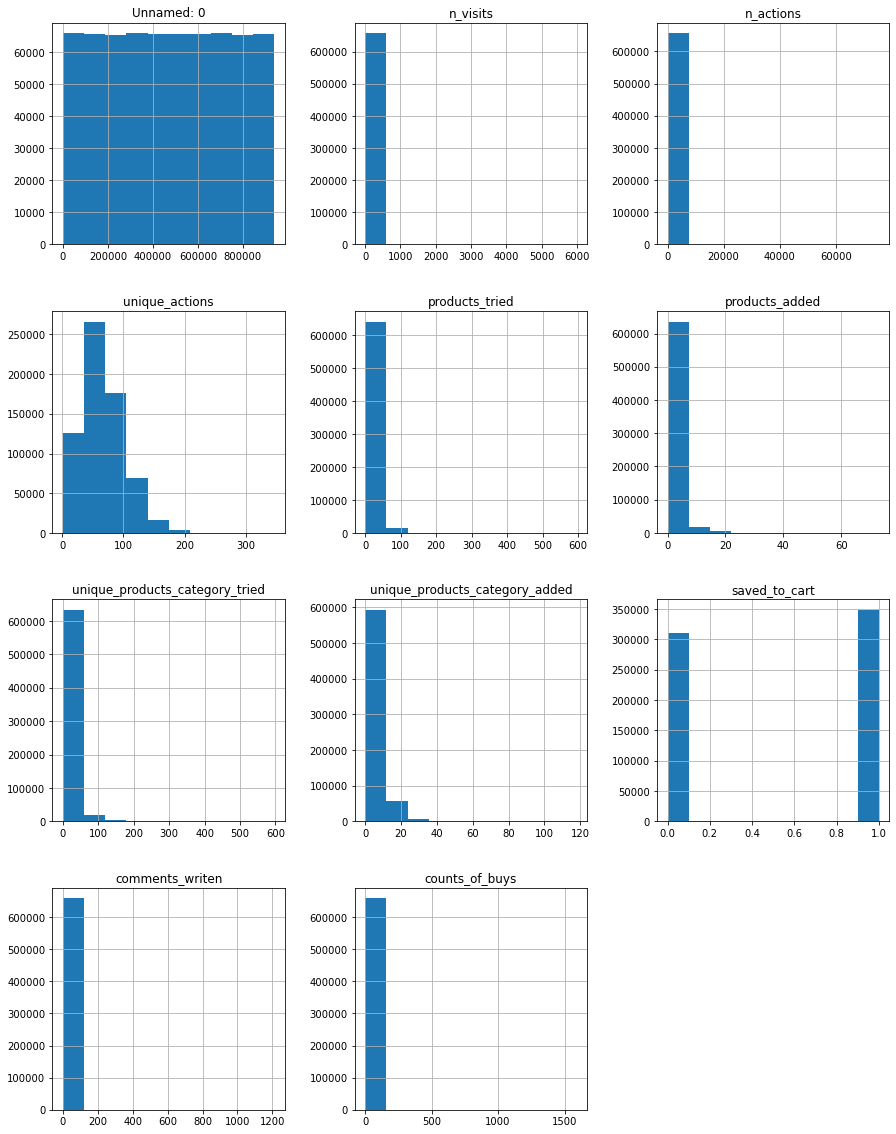

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.drop(["came_back"],axis=1).hist(ax=ax);

As we see ther is MAAANY outliers

Lets drop "unnamed" column, it won't be used

In [11]:
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(["came_back"],axis=1)
y = df['came_back']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
Train, test = train_test_split(df, test_size=0.2, random_state=42)

It is interesting to see that result will give us models before some data pre-processing

In [14]:
from sklearn.metrics import accuracy_score,  roc_auc_score, auc,precision_score, recall_score, f1_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Decision Tree

accuracy: 0.7830500490080616
precision: 0.7245264371602701
recall: 0.5213588090271193
f1_score: 0.6063772591295716
DecistionTree: ROC AUC=0.837


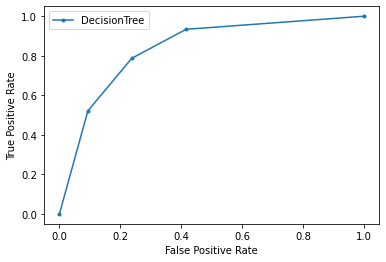

In [15]:
clf = DecisionTreeClassifier(max_leaf_nodes=4)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred1)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred1)
print('precision:', precision1)
recall1 = recall_score(y_test, y_pred1)
print('recall:', recall1)
f1 = f1_score(y_test, y_pred1)
print('f1_score:', f1)

lr_probs1 = clf.predict_proba(X_test)
lr_probs1 = lr_probs1[:, 1]
lr_auc1 = roc_auc_score(y_test, lr_probs1)
print('DecistionTree: ROC AUC=%.3f' % (lr_auc1))
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)

plt.plot(lr_fpr1, lr_tpr1, marker='.', label='DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [16]:
metrics = np.array([acc, precision1, recall1, f1, lr_auc1], dtype=object)
metrics = metrics.reshape((1,5))
before_prep = pd.DataFrame(metrics, index=['Decision Tree'],
                  columns=['accuracy', 'precision', 'recall', 'f1','AUC'])

## Naive Bayes

accuracy: 0.7555371511499799
precision: 0.7076763485477179
recall: 0.4043002086098995
f1_score: 0.5146038259610162
Naive Bayes: ROC AUC=0.802


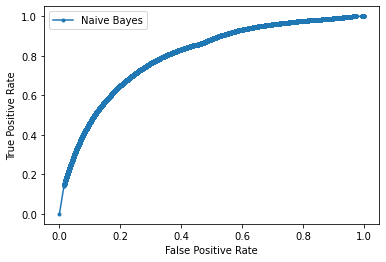

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

acc = accuracy_score(y_test, y_pred1)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred1)
print('precision:', precision1)
recall1 = recall_score(y_test, y_pred1)
print('recall:', recall1)
f1 = f1_score(y_test, y_pred1)
print('f1_score:', f1)

lr_probs2 = gnb.predict_proba(X_test)
lr_probs2 = lr_probs2[:, 1]
lr_auc2 = roc_auc_score(y_test, lr_probs2)
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc2))
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)


plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [18]:
metrics = np.array([acc, precision1, recall1, f1, lr_auc2], dtype=object)
metrics = metrics.reshape((1,5))
df1 = pd.DataFrame(metrics, index=['Naive bayes'],
                  columns=['accuracy', 'precision', 'recall', 'f1', 'AUC'])
before_prep = pd.concat([before_prep, df1], axis=0)

## LDA

accuracy: 0.7636747688263139
precision: 0.7000397154926526
recall: 0.45962924331500093
f1_score: 0.5549147837037248
LDA: ROC AUC=0.809


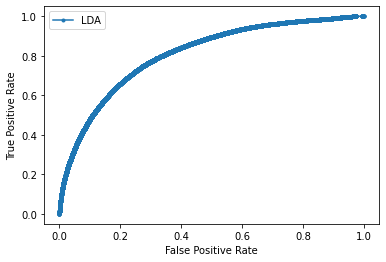

In [19]:
model = LinearDiscriminantAnalysis()

#fit the model
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

acc = accuracy_score(y_test, y_pred2)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred2)
print('precision:', precision1)
recall1 = recall_score(y_test, y_pred2)
print('recall:', recall1)
f1 = f1_score(y_test, y_pred2)
print('f1_score:', f1)

lr_probs1 = model.predict_proba(X_test)
lr_probs1 = lr_probs1[:, 1]
lr_auc1 = roc_auc_score(y_test, lr_probs1)
print('LDA: ROC AUC=%.3f' % (lr_auc1))
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)

plt.plot(lr_fpr1, lr_tpr1, marker='.', label='LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [20]:
metrics = np.array([acc, precision1, recall1, f1, lr_auc1], dtype=object)
metrics = metrics.reshape((1,5))
df1 = pd.DataFrame(metrics, index=['LDA'],
                  columns=['accuracy', 'precision', 'recall', 'f1', 'AUC'])
before_prep = pd.concat([before_prep, df1], axis=0)

## KNN

accuracy: 0.7771690816117194
precision: 0.6999968889027159
recall: 0.5333775839180732
f1_score: 0.60543274987555
KNN: ROC AUC=0.830


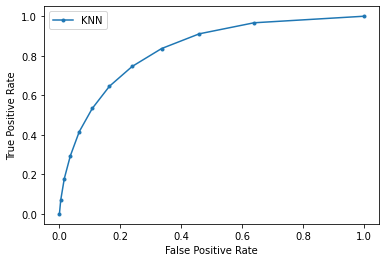

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

acc = accuracy_score(y_test, y_pred2)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred2)
print('precision:', precision1)
recall1 = recall_score(y_test, y_pred2)
print('recall:', recall1)
f1 = f1_score(y_test, y_pred2)
print('f1_score:', f1)

lr_probs1 = model.predict_proba(X_test)
lr_probs1 = lr_probs1[:, 1]
lr_auc1 = roc_auc_score(y_test, lr_probs1)
print('KNN: ROC AUC=%.3f' % (lr_auc1))
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)

plt.plot(lr_fpr1, lr_tpr1, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [22]:
metrics = np.array([acc, precision1, recall1, f1, lr_auc1], dtype=object)
metrics = metrics.reshape((1,5))
df1 = pd.DataFrame(metrics, index=['KNN'],
                  columns=['accuracy', 'precision', 'recall', 'f1', 'AUC'])
before_prep = pd.concat([before_prep, df1], axis=0)

## Logistic Regression

accuracy: 0.770269962237199
precision: 0.7134588588374005
recall: 0.47337853214488906
f1_score: 0.5691362774856427
LR: ROC AUC=0.818


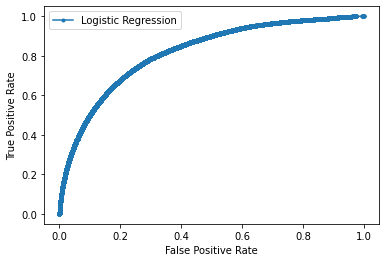

In [23]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

acc = accuracy_score(y_test, y_pred2)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred2)
print('precision:', precision1)
recall1 = recall_score(y_test, y_pred2)
print('recall:', recall1)
f1 = f1_score(y_test, y_pred2)
print('f1_score:', f1)

lr_probs1 = model.predict_proba(X_test)
lr_probs1 = lr_probs1[:, 1]
lr_auc1 = roc_auc_score(y_test, lr_probs1)
print('LR: ROC AUC=%.3f' % (lr_auc1))
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)

plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [24]:
metrics = np.array([acc, precision1, recall1, f1, lr_auc1], dtype=object)
metrics = metrics.reshape((1,5))
df1 = pd.DataFrame(metrics, index=['Logistic Regression'],
                  columns=['accuracy', 'precision', 'recall', 'f1', 'AUC'])
before_prep = pd.concat([before_prep, df1], axis=0)

In [25]:
before_prep

,accuracy,precision,recall,f1,AUC
Decision Tree,0.78305,0.724526,0.521359,0.606377,0.836846
Naive bayes,0.755537,0.707676,0.4043,0.514604,0.801722
LDA,0.763675,0.70004,0.459629,0.554915,0.809478
KNN,0.777169,0.699997,0.533378,0.605433,0.830484
Logistic Regression,0.77027,0.713459,0.473379,0.569136,0.818121


As we see we can have <b>78.3%</b> accuracy with <b>Decision Tree</b>

---

### Now let's explore every data feature seperately

In [26]:
X_train.columns

Index(['n_visits', 'n_actions', 'unique_actions', 'products_tried',
       'products_added', 'unique_products_category_tried',
       'unique_products_category_added', 'saved_to_cart', 'comments_writen',
       'counts_of_buys'],
      dtype='object')

In [27]:
def box_hist(a):
    sns.set(style="ticks")


    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(a, ax=ax_box)
    sns.distplot(a, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

def without_out(a):   
    fig, ax = plt.subplots(figsize = (8,6))
    bp = ax.boxplot(a, showmeans=True, showfliers=False)
    ax.set_title('without outlier', fontweight='bold');

- n_visits : number of visits of the website during the first 3 days.

/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


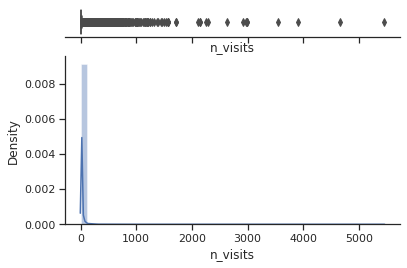

In [28]:
box_hist(X_train.n_visits)

now let's look at this boxplot <b>without</b> "outliers"

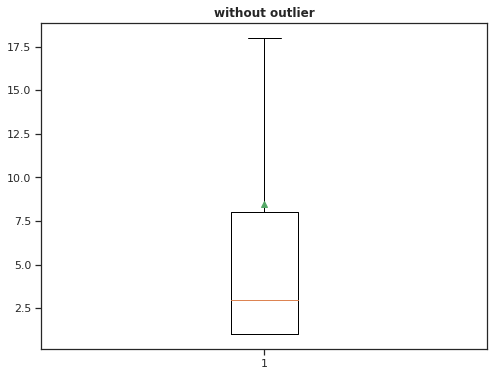

In [29]:
without_out(X_train.n_visits)

Now let's do same with other features

- n_actions : number of actions/button clicks in the website during the first 3 days.

/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


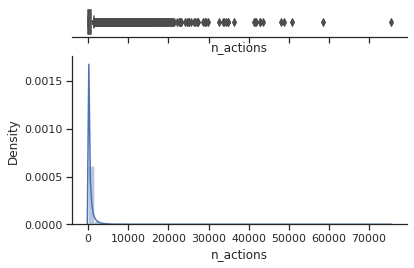

In [30]:
box_hist(X_train.n_actions)

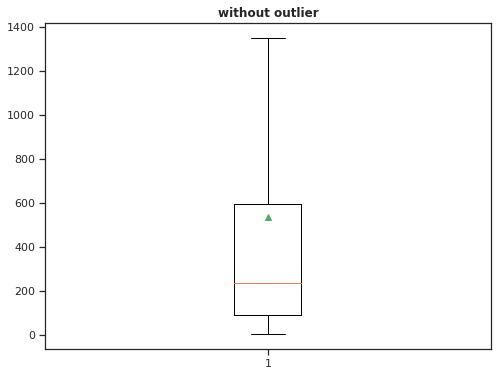

In [31]:
without_out(X_train.n_actions)

- unique_actions : number of unique actions in the website during the first 3 days.

/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


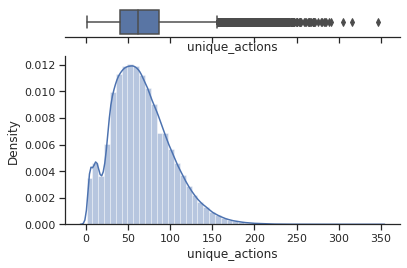

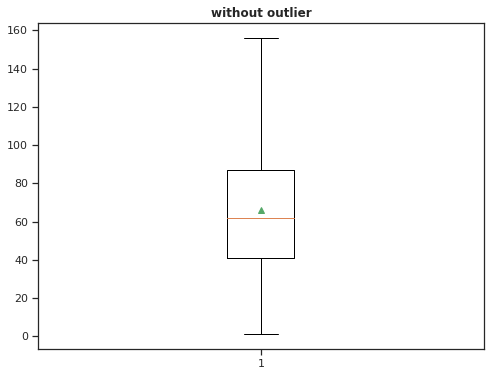

In [32]:
box_hist(X_train.unique_actions)
without_out(X_train.unique_actions)

It is interesting if there is any relationship between actions and unique actions, first of all lets calculate correlation

In [33]:
np.corrcoef(X_train.n_actions,X_train.unique_actions)[0][1]

0.6548218875069415

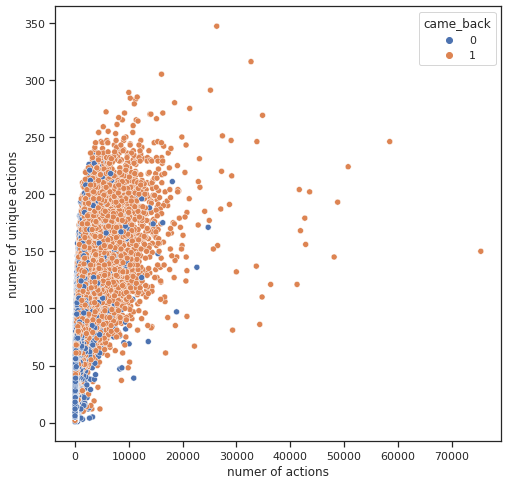

In [34]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = X_train, x = 'n_actions', y = 'unique_actions',  hue = y_train)
plt.xlabel('numer of actions')
plt.ylabel('numer of unique actions')
plt.show()

Hmm... seems something interesting... will be back to this

- products_tried : number of products viewed during the first 3 days.

/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


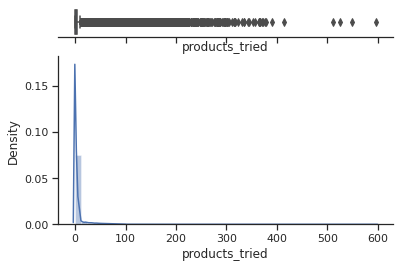

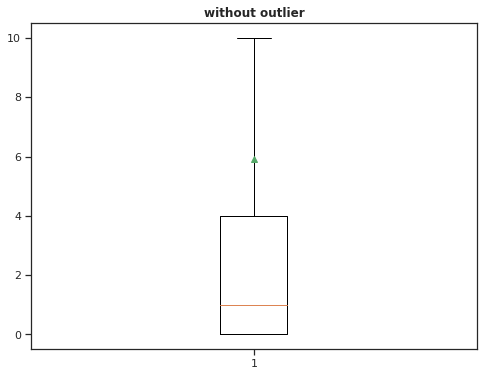

In [35]:
box_hist(X_train.products_tried)
without_out(X_train.products_tried)

In [36]:
X_train.columns

Index(['n_visits', 'n_actions', 'unique_actions', 'products_tried',
       'products_added', 'unique_products_category_tried',
       'unique_products_category_added', 'saved_to_cart', 'comments_writen',
       'counts_of_buys'],
      dtype='object')

- products_added : number of products added to cart during the first 3 days.

/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


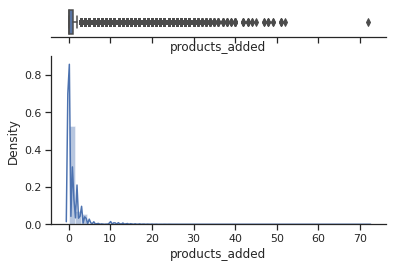

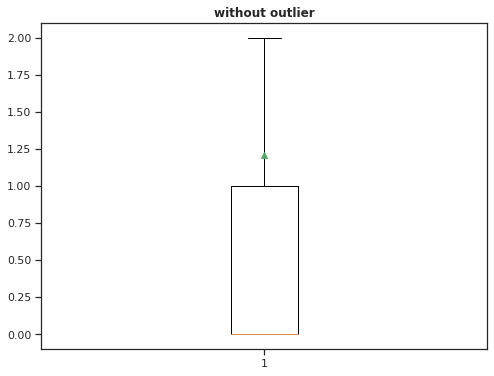

In [37]:
box_hist(X_train.products_added)
without_out(X_train.products_added)

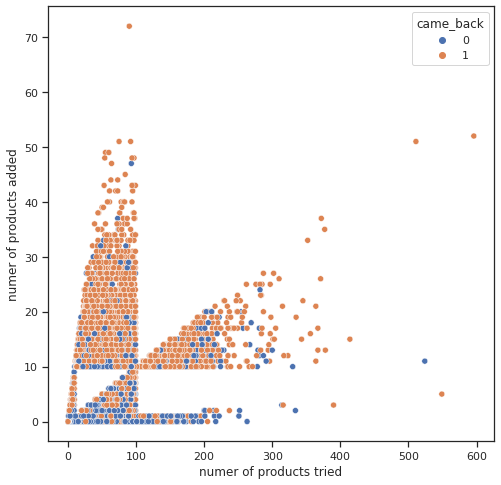

In [38]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = X_train, x = 'products_tried', y = 'products_added',  hue = y_train)
plt.xlabel('numer of products tried')
plt.ylabel('numer of products added')
plt.show()

- unique_products_category_tried : number of unique products’ categories viewed during the first 3 days.

/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


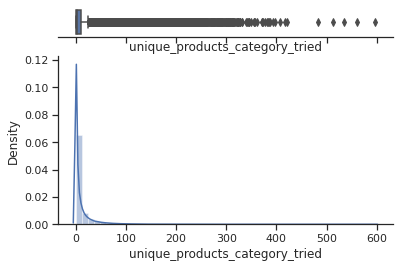

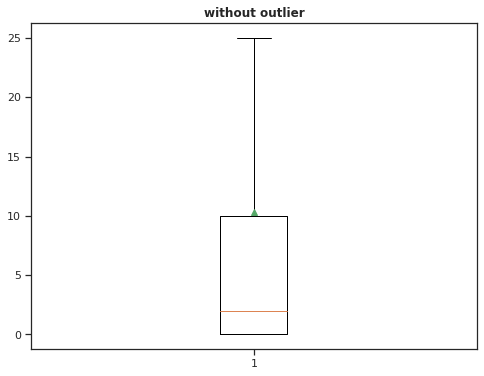

In [39]:
box_hist(X_train.unique_products_category_tried)
without_out(X_train.unique_products_category_tried)

- unique_products_category_added : number of unique products’ categories added to cart during the first 3 days.


/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


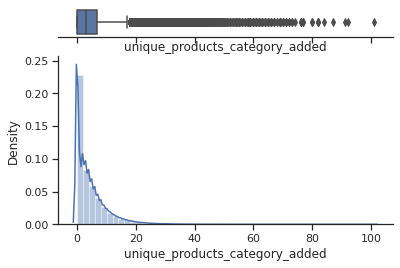

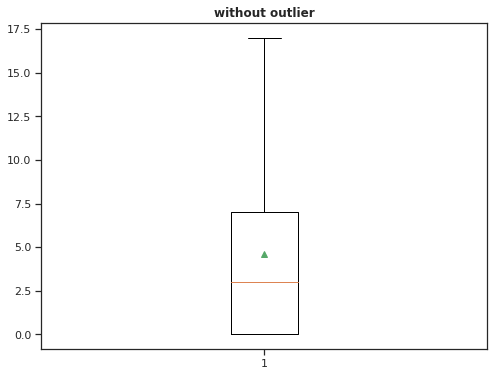

In [40]:
box_hist(X_train.unique_products_category_added)
without_out(X_train.unique_products_category_added)

- saved_to_cart : if the user actually saved the purchases for later purchase during the first 3 days.

In [41]:
X_train.saved_to_cart.value_counts()

1    278684
0    247757
Name: saved_to_cart, dtype: int64

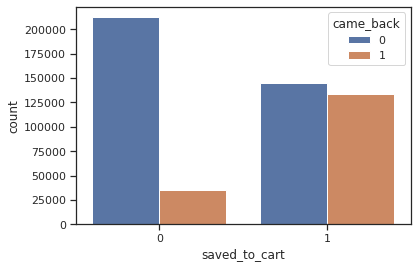

In [42]:
sns.countplot(x =X_train.saved_to_cart, hue = y_train);

as we see saved_to_cart says a _lot_

- comments_writen - how many unique comments the user did during the first 3 days.

/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


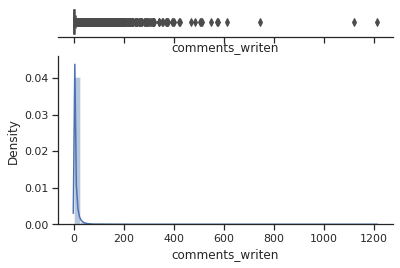

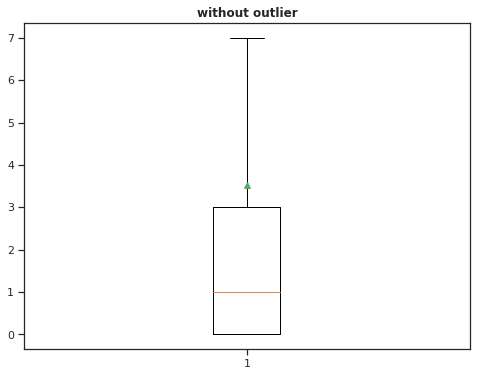

In [43]:
box_hist(X_train.comments_writen)
without_out(X_train.comments_writen)

- counts_of_buys - how many times the user actually paid during the first 3 days

/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mhovhannisyan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


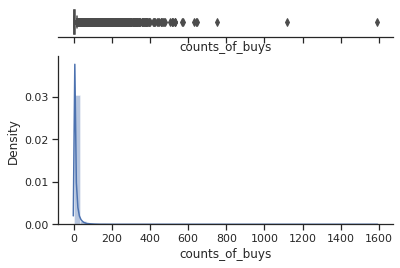

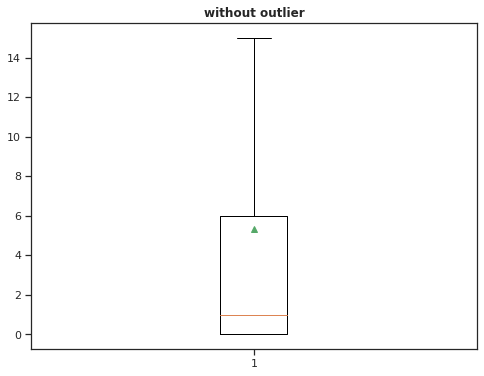

In [44]:
box_hist(X_train.counts_of_buys)
without_out(X_train.counts_of_buys)

Let's look at correlation of our data

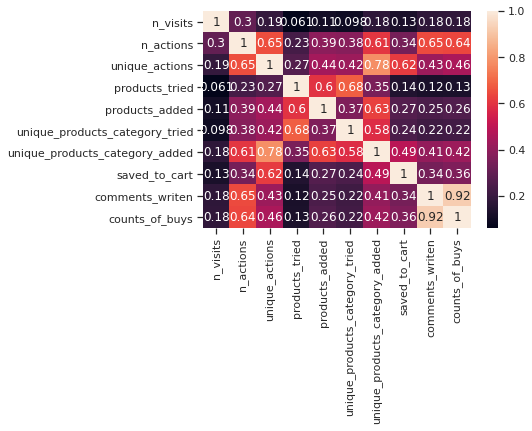

In [45]:
corr = X_train.corr()
sns.heatmap(corr, annot=True);

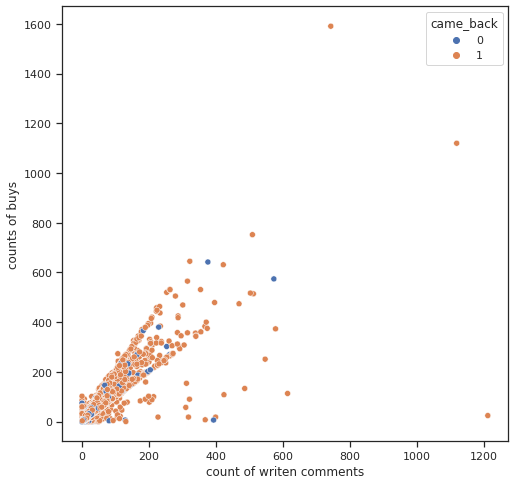

In [46]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = X_train, x = 'comments_writen', y = 'counts_of_buys',  hue = y_train)
plt.xlabel('count of writen comments')
plt.ylabel('counts of buys')
plt.show()

### Now let's find outliers and get rid of it

In [47]:
# I decidet to look at these two distributions seperately

In [48]:
Train0 = Train[Train.came_back == 0]
Train1 = Train[Train.came_back == 1]

In [49]:
# let's do the sipelest way for detecting outliers
from scipy import stats

In [50]:
def Outliers(data, feature, scale):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - scale * IQR
    upper_bound = Q3 + scale * IQR
    
    index = data.index[ (data[feature] < lower_bound) | (data[feature] > upper_bound) ]
    return index

In [51]:
def z_score_outlier(data, feature, threshold):
    mean = np.mean(data[feature])
    std = np.std(data[feature])
    index = data.index[(data[feature]-mean)/std > threshold ]
    return index

In [52]:
def out_exp(data, feature):
    med = np.median(data[feature]) # median is very sensitive     
    trimmed_mean = stats.trim_mean(data[feature], 0.2)
    print(feature,'------- median :',med,'trimmed mean :', trimmed_mean)

    return data.index[data[feature]>7.1*(trimmed_mean)]

In [53]:
index1 = []
for i in X_train.columns:
    index1.extend(z_score_outlier(X_train, i, 3))
index1 = set(index1)
print("Total number of outliers are ", len(index1))

Total number of outliers are  45922


In [54]:
index2 = []
for i in X_train.columns:
    index2.extend(Outliers(X_train, i, 1.5))
index2 = set(index2)
print("Total number of outliers are ", len(index2))

Total number of outliers are  177245


In [55]:
index3 = []
print("Didn't came back")
for i in Train0.drop('came_back',axis = 1).columns:
    index3.extend(z_score_outlier(Train0, i,3))
print('---------------------------------- lenght of outlers now',len(set(index3)))
print("Came back")
for i in Train1.drop('came_back',axis = 1).columns:
    index3.extend(z_score_outlier(Train1, i,3))
index3 = set(index3)
print("Total number of outliers are ", len(index3))

Didn't came back
---------------------------------- lenght of outlers now 27957
Came back
Total number of outliers are  44877


In [56]:
## now let's du this droping outliers with 2 different methods and see the results

In [57]:
drop_out2 = X_train.drop(index3, axis = 0)
y_train2 = y_train.drop(index3, axis = 0)

In [58]:
Train = Train.drop(index3, axis = 0)

In [59]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled = scaler.fit_transform(test.drop('came_back', axis = 1 ))
# print(scaled.shape)

In [60]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_smote, y_smote = smote.fit_resample(test.drop('came_back', axis = 1 ), test['came_back'])

In [61]:
# class_0 = test[test['came_back'] == 0]
# class_1 = test[test['came_back'] == 1]

# class_0_under = class_0.sample(int(class_1.shape[0]*2))

# test_under = pd.concat([class_0_under, class_1], axis=0)

In [62]:
# class_1_over = class_1.sample(class_0.shape[0]//2, replace=True)

# test_over = pd.concat([class_1_over, class_0], axis=0)

accuracy: 0.7321424500991558
precision: 0.5707345947380238
recall: 0.662857955622985
ROC AUC=0.697


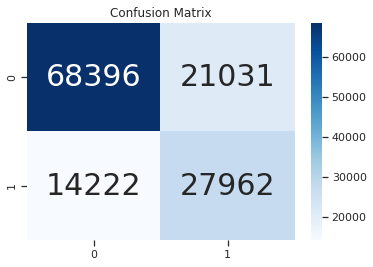

In [63]:
model = DecisionTreeClassifier()
model.fit(drop_out2, y_train2)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred)
print('precision:', precision1)

recall1 = recall_score(y_test, y_pred)
print('recall:', recall1)

lr_probs1 = model.predict_proba(X_test)
lr_probs1 = lr_probs1[:, 1]
lr_auc1 = roc_auc_score(y_test, lr_probs1)
print('ROC AUC=%.3f' % (lr_auc1))
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred)).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

## Undersampling

In [64]:
from imblearn.under_sampling import RandomUnderSampler

In [65]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = 0.6
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_under, y_under = rus.fit_resample(Train.drop('came_back', axis = 1 ), Train['came_back'])
y_under.value_counts()

0    252825
1    151695
Name: came_back, dtype: int64

accuracy: 0.7781720372917157
precision: 0.6543846720707442
recall: 0.6525696946709653


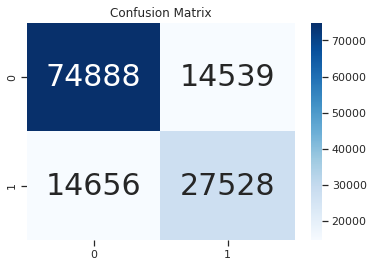

In [66]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_under, y_under)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred)
print('precision:', precision1)

recall1 = recall_score(y_test, y_pred)
print('recall:', recall1)

ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred)).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

### 77.8% accuracy with LG and undersampeled data

## Oversampling

In [67]:
from imblearn.over_sampling import SMOTE
#SMOTE = SMOTE()
#X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(drop_out1, y_train1)

In [68]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = 0.6
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_under, y_under = rus.fit_resample(Train.drop('came_back', axis = 1 ), Train['came_back'])
y_under.value_counts()

0    252825
1    151695
Name: came_back, dtype: int64

In [69]:
from sklearn.utils import resample

Train_majority = Train[Train['came_back'] == 0]
Train_minority = Train[Train['came_back'] == 1]

X_upsampled = resample(Train_minority,
                                 replace=True,     
                                 n_samples=int(len(Train_majority)*0.6),    
                                 random_state=42) 
data_upsempeled = pd.concat([Train_majority, X_upsampled])
X_upsemp, y_upsem = data_upsempeled.drop('came_back', axis = 1), data_upsempeled['came_back']

accuracy: 0.7780960558008069
precision: 0.654280484035851
recall: 0.6524037549781908


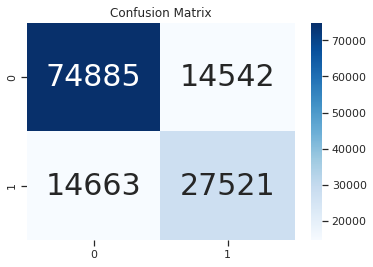

In [70]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_upsemp, y_upsem)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred)
print('precision:', precision1)

recall1 = recall_score(y_test, y_pred)
print('recall:', recall1)

ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred)).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

### 77.8% accuracy with LG and oversampled data

## Scaling

because of min-max scale is very sensitive for our data, let's scale with standard scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler0 = StandardScaler()
X_train_scaled = scaler0.fit_transform(X_train)

In [73]:
scaler1 = StandardScaler()
drop_out2_scaled = scaler1.fit_transform(drop_out2)

In [74]:
scaler2 = StandardScaler()
X_under_scaled = scaler2.fit_transform(X_under)

In [75]:
scaler3 = StandardScaler()
X_upsemp_scaled = scaler3.fit_transform(X_upsemp)

### So we have 
- X_train, y_train (nothing is done with it)
- drop_out2, y_train2 (we dropped outliers)
- X_under, y_under (undersampeled data)
- X_upsemp, y_upsem (upsempeled data)

 And their scaled ones

---

### now let's try to see the results with this datas

Let's starts from <b> KNN </b> 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(2, 30,3))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid_search.best_params_)

In [77]:
## I've already runned cells above, and then restarted, that's why you can't see the results

In [78]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train_scaled, y_train)
X_test0 = scaler0.transform(X_test)
pred_y = knn.predict(X_test0)

In [79]:
accuracy_score(y_test,pred_y)*100

78.62640660735045

<b> 78.6%</b> with scaled data and KNN(n=29) , not bad results

!!!yuhuuuuuu!! not bed results

In [80]:
precision1 = precision_score(y_test, pred_y)
print('precision:', precision1)

recall1 = recall_score(y_test, pred_y)
print('recall:', recall1)

precision: 0.7004964619949783
recall: 0.5819979139010051


ass grid search takes toooo much time, lets see the same k on other data

In [84]:
## data where outlier dropped

In [81]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(drop_out2_scaled, y_train2)
X_test1 = scaler1.transform(X_test)
pred_y = knn.predict(X_test1)
accuracy_score(y_test,pred_y)*100

78.05122672117072

In [82]:
precision1 = precision_score(y_test, pred_y)
print('precision:', precision1)

recall1 = recall_score(y_test, pred_y)
print('recall:', recall1)

precision: 0.6623050069574983
recall: 0.6431348378532145


In [85]:
#+undersampeled and scaled

In [83]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_under_scaled, y_under)
X_test2 = scaler2.transform(X_test)
pred_y = knn.predict(X_test2)
accuracy_score(y_test,pred_y)*100

77.74578112771728

In [86]:
precision1 = precision_score(y_test, y_pred)
print('precision:', precision1)

recall1 = recall_score(y_test, y_pred)
print('recall:', recall1)

precision: 0.654280484035851
recall: 0.6524037549781908


In [88]:
##outilers dropped + upsempeled  + scaled

In [89]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_upsemp_scaled, y_upsem)
X_test3 = scaler2.transform(X_test)
pred_y = knn.predict(X_test3)
accuracy_score(y_test,pred_y)*100

76.44193874372203

In [90]:
precision1 = precision_score(y_test, y_pred)
print('precision:', precision1)

recall1 = recall_score(y_test, y_pred)
print('recall:', recall1)

precision: 0.654280484035851
recall: 0.6524037549781908


---

accuracy: 0.7760065648008145
precision: 0.6856767027185033
recall: 0.5560639104873886
f1_score: 0.6141058198287823
LDA: ROC AUC=0.825


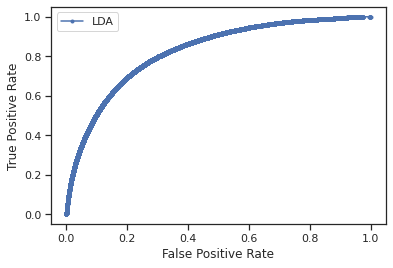

In [91]:
model = LinearDiscriminantAnalysis()

#fit the model
model.fit(drop_out2, y_train2)
y_pred2 = model.predict(X_test)

acc = accuracy_score(y_test, y_pred2)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred2)
print('precision:', precision1)
recall1 = recall_score(y_test, y_pred2)
print('recall:', recall1)
f1 = f1_score(y_test, y_pred2)
print('f1_score:', f1)

lr_probs1 = model.predict_proba(X_test)
lr_probs1 = lr_probs1[:, 1]
lr_auc1 = roc_auc_score(y_test, lr_probs1)
print('LDA: ROC AUC=%.3f' % (lr_auc1))
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)

plt.plot(lr_fpr1, lr_tpr1, marker='.', label='LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

accuracy: 0.7737043256262774
precision: 0.6572493723212701
recall: 0.6143561539920349
f1_score: 0.6350793359063898
LDA: ROC AUC=0.823


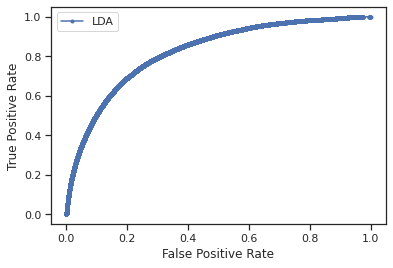

In [92]:
model = LinearDiscriminantAnalysis()

#fit the model
model.fit(X_under, y_under)
y_pred2 = model.predict(X_test)

acc = accuracy_score(y_test, y_pred2)
print("accuracy:", acc)
precision1 = precision_score(y_test, y_pred2)
print('precision:', precision1)
recall1 = recall_score(y_test, y_pred2)
print('recall:', recall1)
f1 = f1_score(y_test, y_pred2)
print('f1_score:', f1)

lr_probs1 = model.predict_proba(X_test)
lr_probs1 = lr_probs1[:, 1]
lr_auc1 = roc_auc_score(y_test, lr_probs1)
print('LDA: ROC AUC=%.3f' % (lr_auc1))
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)

plt.plot(lr_fpr1, lr_tpr1, marker='.', label='LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Conclusion

As we've seen, _Decision Tree_ give us <b>78.3%</b> accuracy without doing anything. <br>
And the best accuracy that I've got was with scaled row data with _KNN (n=29)_  <b>78.6%</b> (precision: 0.70 , recall: 0.58) . <br>
Based on the problem we can choose different models. Also with undersamled and scaled data with KNN I've got results like accuracy <b> 77.74%</b>  and precision=recall=<b>0.65</b> . I liked it more. So based on given problem we can choose different models. What interesed us more?. for example _Do we need  to predict better those ones who didn't came back, or those who came_?

And also Yenok jan sorry me for killing you "քոռ դանակով" with my english :)) 

<b> Thank you!!! </b>